# 2023-10-13 More about aperture photometry

## Overview

+ Review pixel counting ideas from last time
+ Overview of getting sky background 
+ Estimating sky background
+ Aperture size

In [54]:
from astropy.modeling.models import Gaussian2D
from astropy.stats import gaussian_sigma_to_fwhm

from matplotlib import pyplot as plt

import numpy as np

In [55]:
def image_with_pixels_labeled(image, **text_kwargs):
    image_size = image.shape[0]
    plt.imshow(image)
    plt.colorbar()
    for i in range(image_size):
        for j in range(image_size):
            plt.text(i, j, int(image[j, i]), 
                     fontweight='bold',
                     horizontalalignment='center',
                     verticalalignment='center',
                     **text_kwargs
                    )
            plt.scatter(i, j, marker='.', c='red', alpha=0.5)


In [56]:
def circle(x, y, radius):
    angle = np.linspace(0, 2 * np.pi)
    return x + radius * np.cos(angle), y + radius * np.sin(angle)

In [57]:
rng = np.random.default_rng(seed=548975)

In [58]:
figure_size = (20, 20)
image_size = 25
star_center = (12, 12)
sigma = 2  # Gaussian width of the star
background_image = rng.poisson(lam=200, size=[image_size, image_size])

In [59]:
circ = circle(*star_center, 2.1)

## Part 1

### A fake image: background only

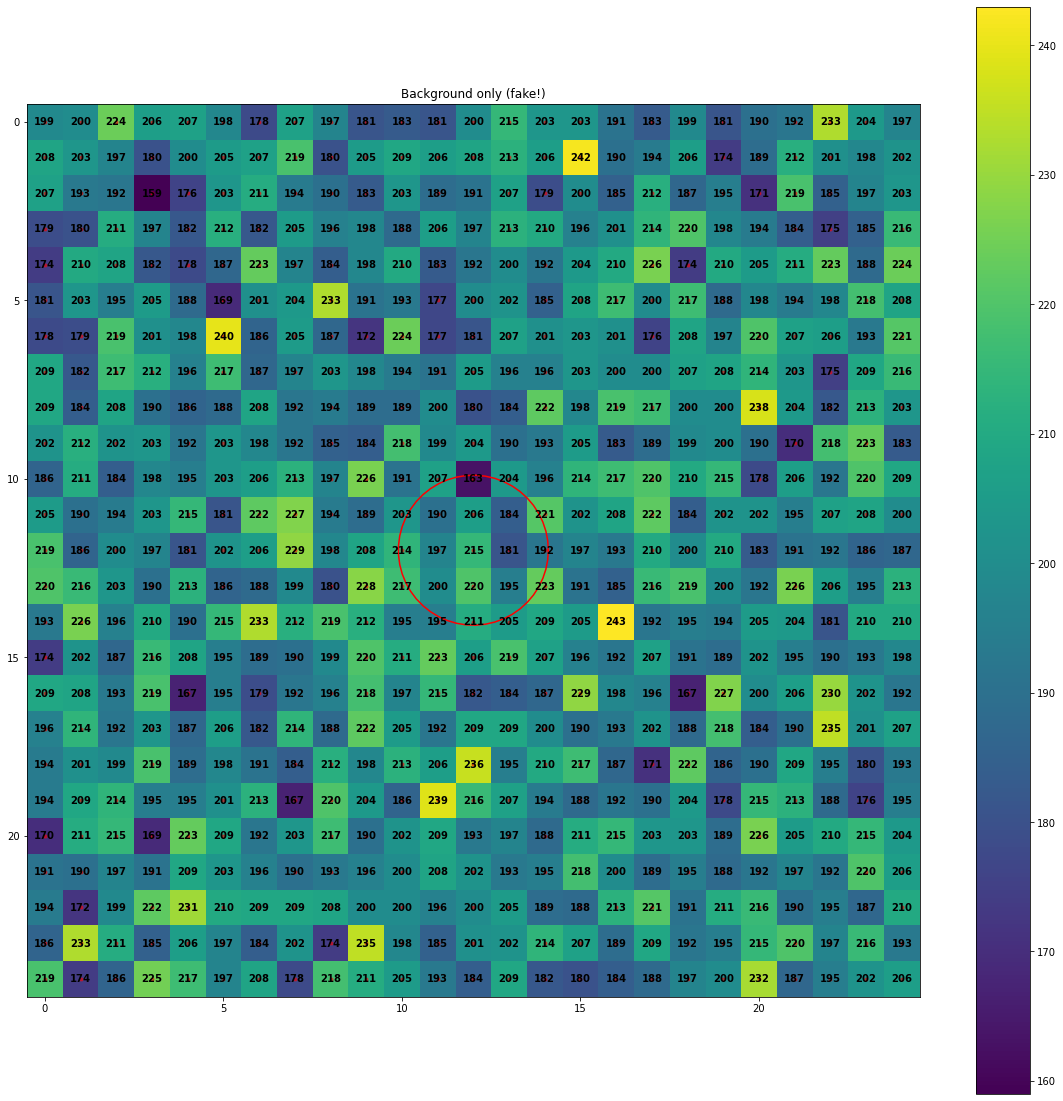

In [60]:
plt.figure(figsize=figure_size)

image_with_pixels_labeled(background_image, color='black')
plt.title('Background only (fake!)')
plt.plot(circ[0], circ[1], color='red');
        

In [61]:

fwhm = sigma * gaussian_sigma_to_fwhm

star = Gaussian2D(amplitude=200, x_stddev=sigma, y_stddev=sigma)
grids = np.mgrid[0:image_size, 0:image_size]
star_grid = star(grids[0] - star_center[0], grids[1] - star_center[0])

In [62]:
total_image = background_image + star_grid

### Same image, now with a star added on

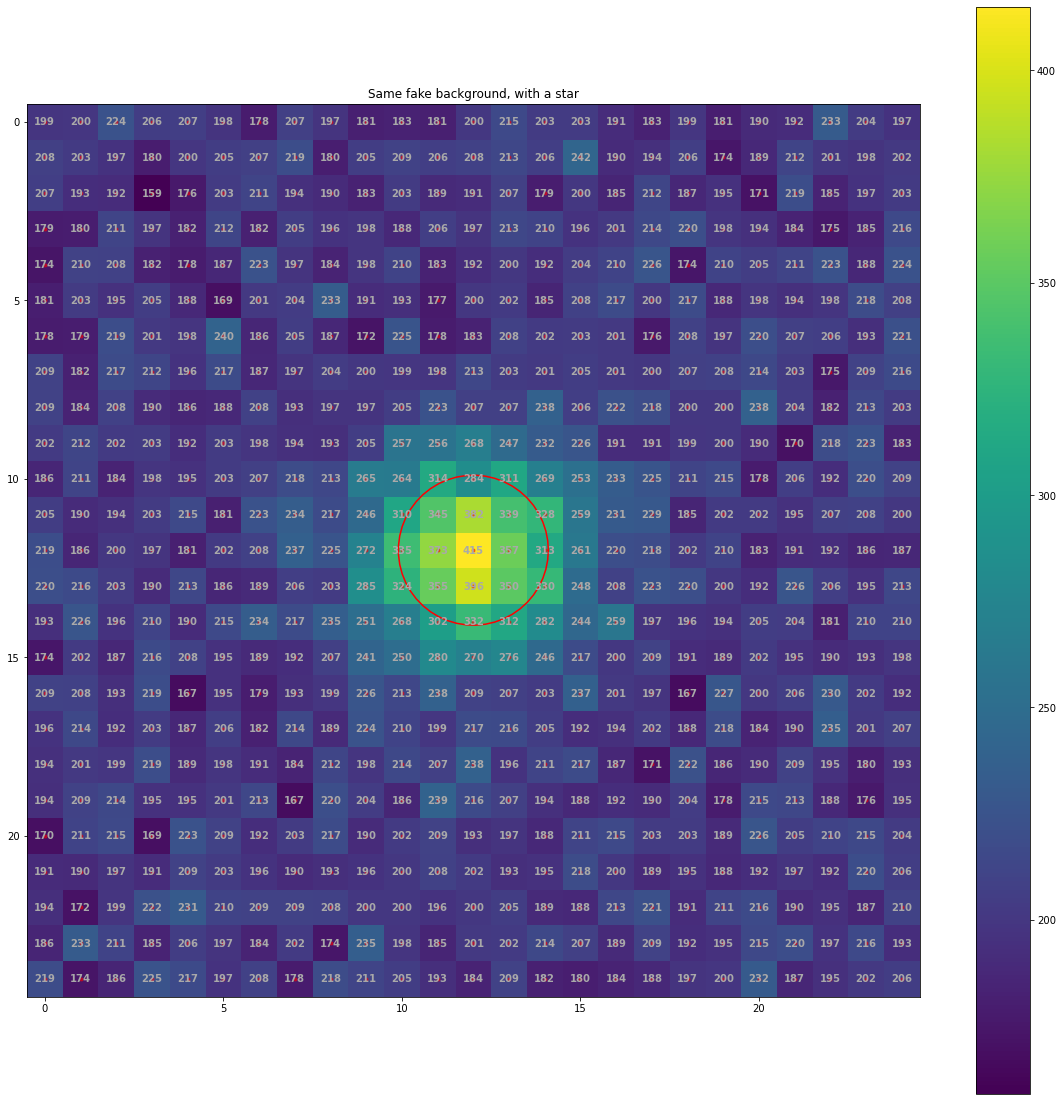

In [63]:
plt.figure(figsize=figure_size)

image_with_pixels_labeled(total_image, color='darkgray')
plt.title('Same fake background, with a star')
plt.plot(circ[0], circ[1], color='red');
        

### New image, star and background, no separate background image

In [64]:
new_background_image = rng.poisson(lam=200, size=[image_size, image_size])
new_total_image = new_background_image + star_grid

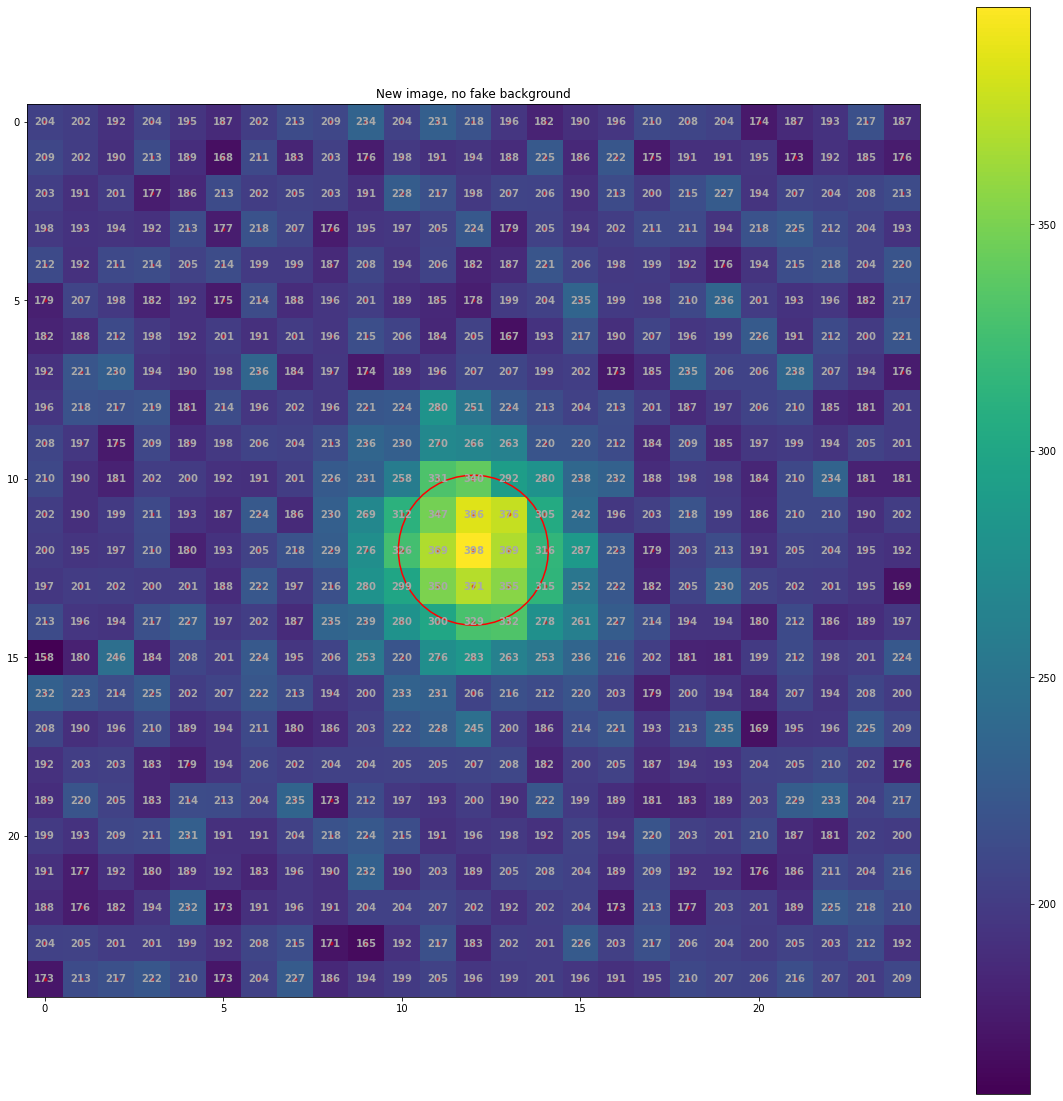

In [69]:
plt.figure(figsize=figure_size)

image_with_pixels_labeled(new_total_image, color='darkgray')

plt.title('New image, no fake background')
plt.plot(circ[0], circ[1], color='red');
    

## Part 2: Aperture Size

### Star only (another fake image!)

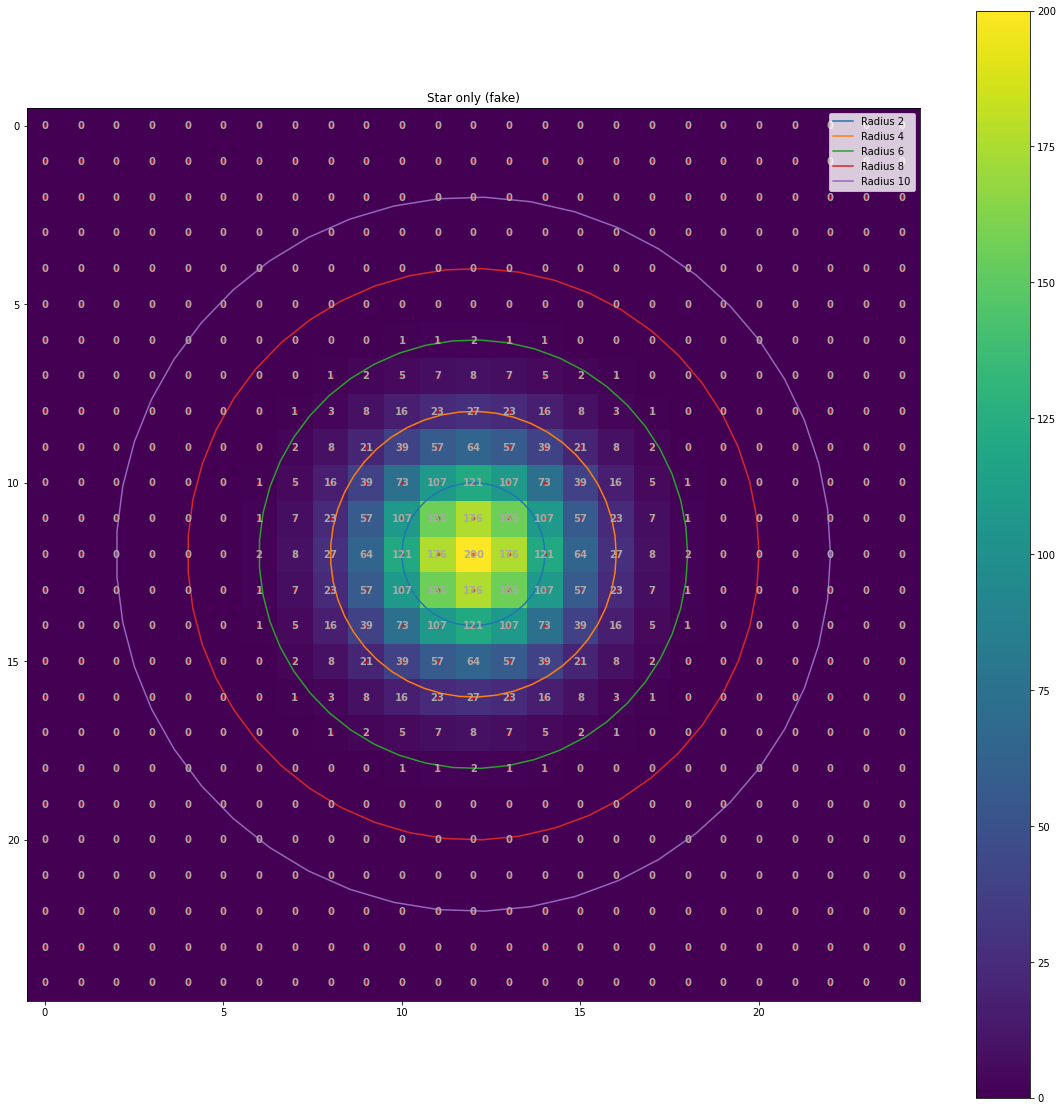

In [66]:
plt.figure(figsize=figure_size)

image_with_pixels_labeled(star_grid, color='darkgray')

for i in range(5):
    radius = 2 + i * 2
    i_circ = circle(*star_center, radius)
    plt.plot(i_circ[0], i_circ[1], label=f'Radius {radius}');
plt.title('Star only (fake)')  
plt.legend()

### Star and background

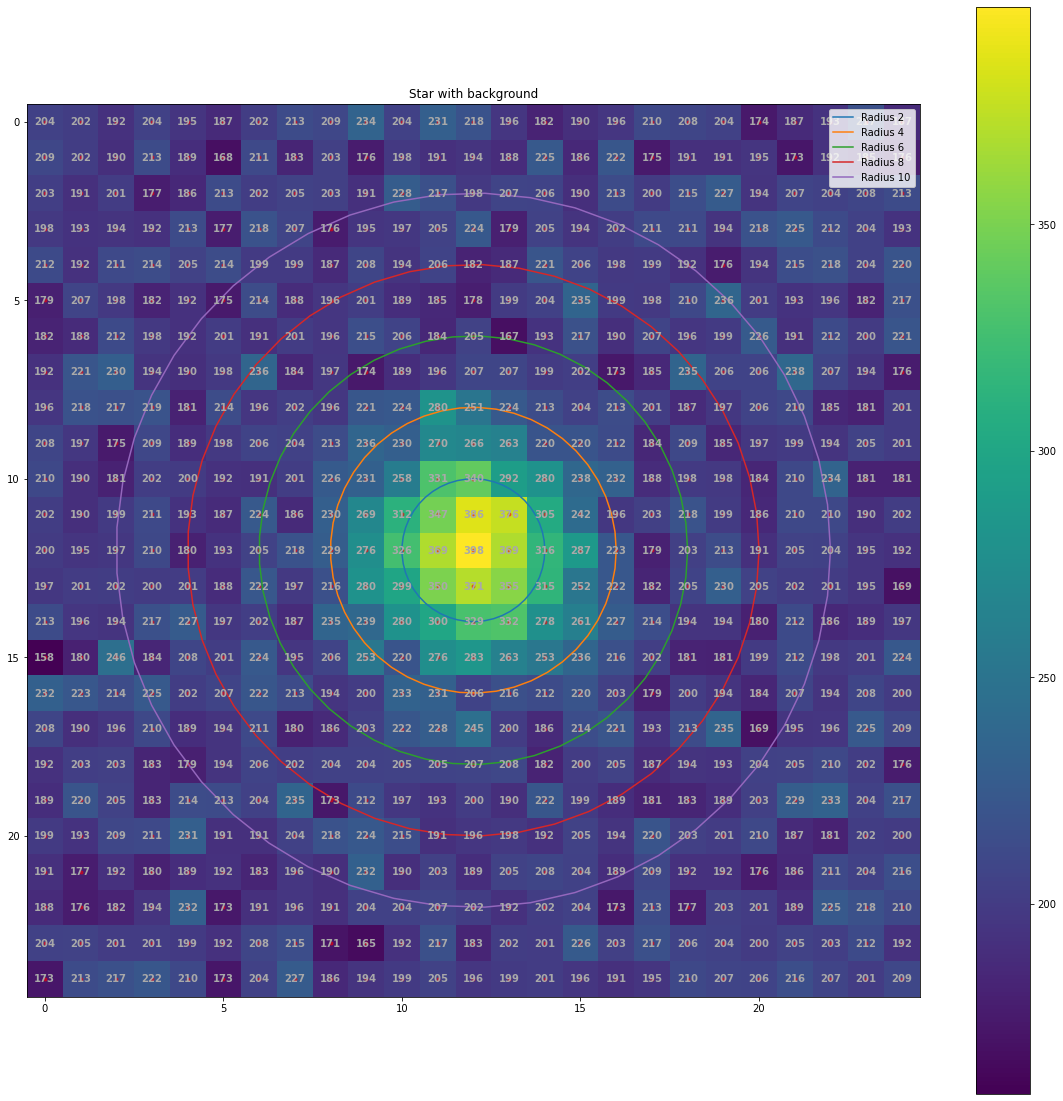

In [67]:
plt.figure(figsize=figure_size)

image_with_pixels_labeled(new_total_image, color='darkgray')

for i in range(5):
    radius = 2 + i * 2
    i_circ = circle(*star_center, radius)
    plt.plot(i_circ[0], i_circ[1], label=f'Radius {radius}');

plt.title('Star with background')
plt.legend()